# Update/change an existing target

Sometime, you don't want to use exactly the pre-defined target as it is given. You may want to change the model function parameters (the `kwargs`) or even the function (the `func`) used to draw a given target. 

You can do that while calling `draw()`, `from_draw()` or simply using `update_model()`. 

Let's see the difference.

***
## Changing model entry's parameters

This is the simplest and the most commun usage. You want to change the `func` parameters of a given model. You can do that using the `**kwargs` of `draw()` (`from_draw()`) method. 

for instance, let's change the **alpha** and **beta** parameters of the SNeIa model. **alpha** and **beta** are parameters of the magabs model (see, `skysurvey.target.snia.SNeIaMagnitude.tripp1998`):

In [1]:
import skysurvey

snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 magabs={"alpha":-0.15, "beta":3.8} # kwargs here
                                )
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec,template
0,0.1325,0.090,0.037,56131.175781,-19.097757,19.946224,0.000167,108.411896,50.401718,salt2
1,0.1615,-0.725,0.040,56150.039062,-19.057224,20.455572,0.000104,116.750946,26.500448,salt2
2,0.1735,-0.620,0.204,56162.152344,-18.386381,21.297745,0.000048,264.678986,-35.023483,salt2
3,0.1515,0.340,-0.002,56087.441406,-19.240986,20.119730,0.000142,233.167725,15.450485,salt2
4,0.1815,-0.440,0.195,56027.406250,-18.636923,21.155407,0.000055,282.316711,80.363380,salt2
...,...,...,...,...,...,...,...,...,...,...
995,0.1735,-0.545,0.172,56026.535156,-18.644131,21.039995,0.000061,182.266571,-7.816083,salt2
996,0.1475,-0.900,-0.028,56038.398438,-19.179735,20.117514,0.000142,200.803375,-62.042667,salt2
997,0.1405,0.585,0.109,56031.257812,-19.018888,20.163321,0.000137,20.879925,6.125438,salt2
998,0.1785,1.480,-0.094,56079.078125,-19.868958,19.883324,0.000177,162.705109,-26.562500,salt2


Any kwargs change like that is not affecting the actual object model, but simply updates it while drawing the data. 

so the model itself is not changed.

In [2]:
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x294a161f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x294a16160>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x294a16280>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x16c714160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

**consequently, drawing again from the model will not be affected by this update**

### update the instance model entry parameter

To permanently change the model of the instance, you need to use ``self.update_model_parameter()``

In [3]:
snia.update_model_parameter(magabs={"alpha":-0.15, "beta":3.8} )
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x294a161f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x294a16160>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x294a16280>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x16c714160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

***
## Changing model entry's (func and kwargs)

changing the entry's func (and its parameters) changes the model more in depts. To do that, you can use:
- the **model** option in `draw()`: this will update the model used to draw but will not affect the actual instance's model
- the **model** option in `from_draw()`: this changes the model while creating the instance, it is thus permanent 
- the `update_model()` method: this is permanent (it is what `from_draw()` uses).

For instance, let's say that the snia "c" parameter should not be drawn following a uniform distribution between -1 and +3. You need to redifined how c is modelled:

In [4]:
import numpy as np
model_c = {"c": {"func": np.random.uniform, "kwargs": {"low":-1, "high":+3}}}

In [5]:
snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 model=model_c
                                )


<Axes: ylabel='Frequency'>

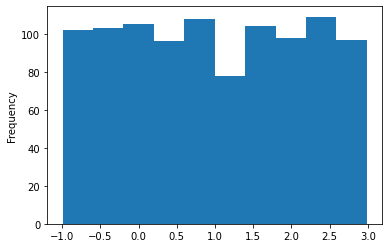

In [20]:
snia.data["c"].plot.hist()

so here, the change is permanent:

In [9]:
snia.model # check-out the c-entry

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x294a161f0>},
 'c': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
       'kwargs': {'low': -1, 'high': 3}},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x294a16280>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x16c714160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

But if we now draw again, changing, say x1 as a uniform distribution too

<Axes: ylabel='Frequency'>

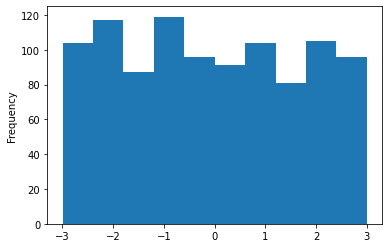

In [18]:
model_x1 = {"x1": {"func": np.random.uniform, "kwargs": {"low":-3, "high":+3}}}
data_x1flat = snia.draw(size=1000, model=model_x1)
data_x1flat["x1"].plot.hist()

but if we do it again without:

<Axes: ylabel='Frequency'>

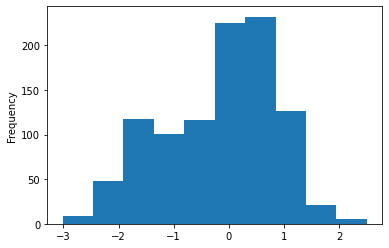

In [19]:

data_x1flat = snia.draw(size=1000)#, model=model_x1)
data_x1flat["x1"].plot.hist()

while "c" still is flat

<Axes: ylabel='Frequency'>

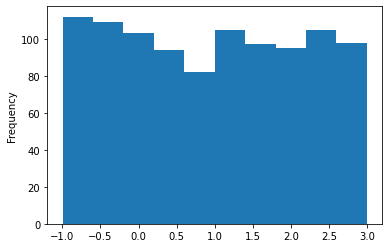

In [21]:

data_x1flat = snia.draw(size=1000)#, model=model_x1)
data_x1flat["c"].plot.hist()

### update_model

you can directly change (permanently) the model using update_model

In [22]:
flat_model = {"c": {"func": np.random.uniform, "kwargs": {"low":-0.1, "high":+1}},
              "x1": {"func": np.random.uniform, "kwargs": {"low":-3, "high":+3}}
             }

snia = skysurvey.SNeIa()
snia.update_model(**flat_model)
data = snia.draw(1_000)

In [23]:
data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.0745,2.085478,0.123513,56060.344394,-19.241942,18.468710,0.000650,82.838320,47.200583
1,0.0805,-2.025811,0.433947,56015.415034,-17.655552,20.232211,0.000128,161.117479,-37.949688
2,0.1065,0.807496,0.332289,56097.928460,-18.323621,20.209656,0.000131,11.324980,-28.978693
3,0.1555,-2.034821,0.016078,56158.402271,-18.965969,20.456669,0.000104,236.731620,4.145109
4,0.0795,-0.781528,0.513631,56175.316082,-17.702513,20.156626,0.000137,59.901789,72.593947
...,...,...,...,...,...,...,...,...,...
995,0.1515,-2.396482,0.249506,56127.273247,-18.044146,21.316569,0.000047,203.948231,-34.998608
996,0.1305,-1.267226,0.390439,56072.642337,-17.709347,21.298857,0.000048,144.105919,0.309306
997,0.1985,2.901974,0.340106,56189.542496,-18.551960,21.456346,0.000042,74.972726,-50.966763
998,0.1215,-1.502519,0.693316,56155.863761,-16.975052,21.865506,0.000028,199.213455,-0.512277
